In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Benchmark results

Tested on AWS EC2 c6i.large instance.

In [2]:
delay = pd.read_json('results/delay.jsonl', lines=True)
delay


,transactions_per_second,queries_per_second,latency_min,latency_avg,latency_max,latency_95th,replicas,delay,loss,time,primary_cpu,replica_cpu
0,164.26,3285.17,5.60,6.09,14.15,6.55,1,5,0,10.022326,0.5,0.5
1,158.90,3178.09,5.77,6.29,13.40,6.91,2,5,0,10.025734,0.5,0.5
2,151.77,3035.41,6.04,6.59,11.01,7.17,1,10,0,10.028173,0.5,0.5
3,147.47,2949.37,6.19,6.78,11.54,7.56,2,10,0,10.021632,0.5,0.5
4,145.39,2907.73,6.37,6.88,12.64,7.43,1,15,0,10.027668,0.5,0.5
5,143.03,2860.62,6.49,6.99,11.69,7.43,2,15,0,10.024988,0.5,0.5
6,139.36,2787.14,6.70,7.17,12.28,7.70,1,20,0,10.023740,0.5,0.5
7,135.10,2702.06,6.86,7.40,16.39,8.13,2,20,0,10.026271,0.5,0.5
8,131.50,2630.01,7.09,7.60,11.41,8.13,1,25,0,10.027976,0.5,0.5
9,130.90,2617.91,7.18,7.64,11.51,7.98,2,25,0,10.028418,0.5,0.5


Text(0, 0.5, 'transactions per second')

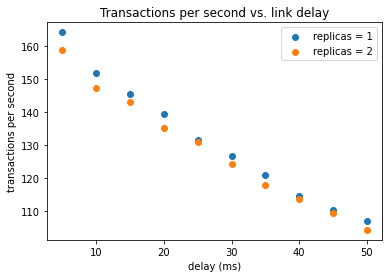

In [3]:
plt.title('Transactions per second vs. link delay')
plt.scatter(delay[delay['replicas'] == 1]['delay'], delay[delay['replicas'] == 1]['transactions_per_second'])
plt.scatter(delay[delay['replicas'] == 2]['delay'], delay[delay['replicas'] == 2]['transactions_per_second'])
plt.legend(['replicas = 1', 'replicas = 2'])
plt.xlabel('delay (ms)')
plt.ylabel('transactions per second')

In [4]:
primary_cpu = pd.read_json('results/primary_cpu.jsonl', lines=True)
primary_cpu


,transactions_per_second,queries_per_second,latency_min,latency_avg,latency_max,latency_95th,replicas,delay,loss,time,primary_cpu,replica_cpu
0,97.49,1949.87,4.99,10.25,56.61,51.94,1,0,0,10.039366,0.1,0.5
1,183.38,3667.50,4.99,5.45,15.95,5.99,1,0,0,10.024761,0.2,0.5
2,186.49,3729.79,4.97,5.36,8.55,5.77,1,0,0,10.023957,0.3,0.5
3,180.37,3607.46,5.01,5.54,11.85,6.21,1,0,0,10.026155,0.4,0.5
4,179.67,3593.49,5.02,5.56,11.54,6.21,1,0,0,10.025831,0.5,0.5


Text(0, 0.5, 'transactions per second')

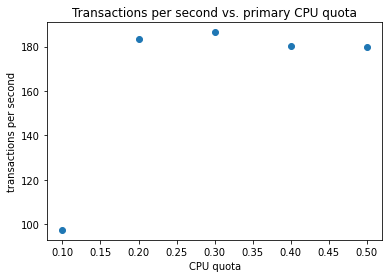

In [5]:
plt.title('Transactions per second vs. primary CPU quota')
plt.scatter(primary_cpu['primary_cpu'], primary_cpu['transactions_per_second'])

plt.xlabel('CPU quota')
plt.ylabel('transactions per second')

In [6]:
replica_cpu = pd.read_json('results/replica_cpu.jsonl', lines=True)
replica_cpu

,transactions_per_second,queries_per_second,latency_min,latency_avg,latency_max,latency_95th,replicas,delay,loss,time,primary_cpu,replica_cpu
0,175.88,3517.63,5.07,5.68,14.56,6.55,1,0,0,10.027609,0.5,0.1
1,184.75,3695.01,4.96,5.41,10.78,5.77,1,0,0,10.021190,0.5,0.2
2,185.66,3713.17,4.96,5.38,17.01,5.77,1,0,0,10.020549,0.5,0.3
3,180.50,3610.03,5.01,5.54,10.94,6.21,1,0,0,10.025057,0.5,0.4
4,179.61,3592.26,5.02,5.56,14.12,6.43,1,0,0,10.023235,0.5,0.5


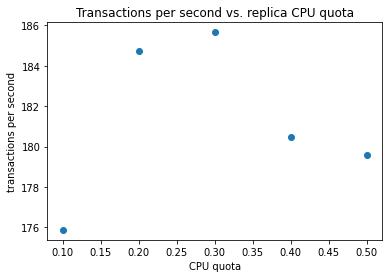

In [7]:
plt.title('Transactions per second vs. replica CPU quota')
plt.scatter(replica_cpu['replica_cpu'], replica_cpu['transactions_per_second'])

plt.xlabel('CPU quota')
plt.ylabel('transactions per second')
plt.show()

In [8]:
replicas = pd.read_json('results/replicas.jsonl', lines=True)
replicas

,transactions_per_second,queries_per_second,latency_min,latency_avg,latency_max,latency_95th,replicas,delay,loss,time,primary_cpu,replica_cpu
0,180.20,3604.09,4.98,5.55,15.88,6.21,1,0,0,10.024319,0.5,0.5
1,173.39,3467.78,5.19,5.76,15.65,6.32,2,0,0,10.025350,0.5,0.5
2,169.55,3390.99,5.30,5.90,13.11,6.67,3,0,0,10.041585,0.5,0.5
3,169.15,3383.09,5.31,5.91,11.87,6.79,4,0,0,10.052585,0.5,0.5
4,170.02,3400.40,5.37,5.88,28.26,6.32,5,0,0,10.043214,0.5,0.5


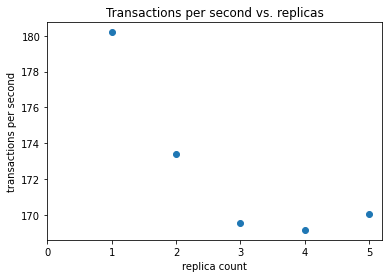

In [9]:
plt.title('Transactions per second vs. replicas')
plt.scatter(replicas['replicas'], replicas['transactions_per_second'])

plt.xlabel('replica count')
plt.xticks(np.arange(0, 6))
plt.ylabel('transactions per second')
plt.show()

Text(0, 0.5, 'latency (ms)')

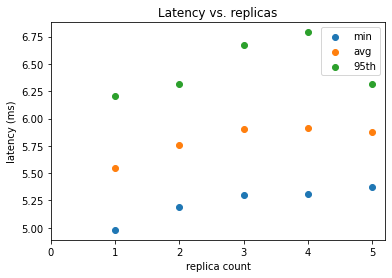

In [10]:
plt.title("Latency vs. replicas")
plt.scatter(replicas['replicas'], replicas['latency_min'])
plt.scatter(replicas['replicas'], replicas['latency_avg'])
plt.scatter(replicas['replicas'], replicas['latency_95th'])
plt.legend(['min', 'avg', '95th'])
plt.xlabel('replica count')
plt.xticks(np.arange(0, 6))
plt.ylabel('latency (ms)')